In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Numerical Error

## Part (a)
Write code to generate an array of length $N$, filled with random numbers from a Gaussian distribution (with mean $x$ and standard deviation $\sigma$), and make a histogram (with $m$ bins) of the array values. (You are encouraged to import functions from numpy and matplotlib.pyplot) Test this code, performing at least two sanity checks to make sure it's working properly.

(array([  4.,   5.,  14.,  22.,  37.,  54.,  90., 122., 123., 112., 102.,
        101.,  79.,  63.,  39.,  21.,   8.,   1.,   2.,   1.]),
 array([-0.29402073, -0.26254473, -0.23106873, -0.19959274, -0.16811674,
        -0.13664074, -0.10516474, -0.07368874, -0.04221275, -0.01073675,
         0.02073925,  0.05221525,  0.08369125,  0.11516724,  0.14664324,
         0.17811924,  0.20959524,  0.24107124,  0.27254723,  0.30402323,
         0.33549923]),
 <BarContainer object of 20 artists>)

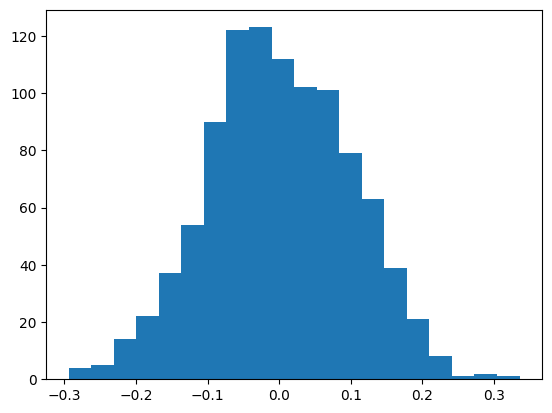

In [5]:
N = np.random.normal(0,0.1,1000) #making random gaussian array length 1000 with mean of 0 and std of 0.1 
N
plt.hist(N, bins = 20) #plotting histogram with 20 bins 


## Part (b)
Now write a function to: generate two arrays as in the previous part (where the first Gaussian has  $x_1,\sigma_1$ and the second Gaussian has $x_2,\sigma_2$), make a third array that is the element-wise sum of these two arrays, and make a histogram of the 'array values. The function should take $x_1,\sigma_1, x_2, \sigma_2$ as arguments.

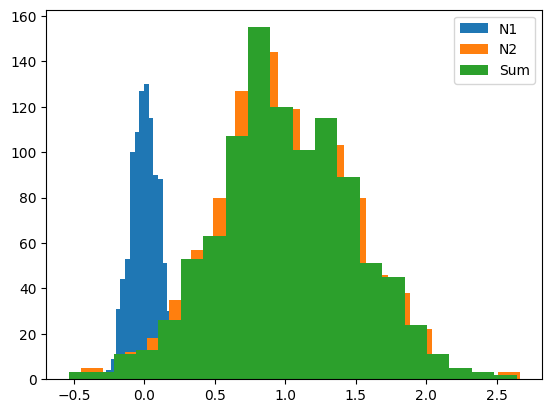

In [10]:
N_1 = np.random.normal(0,0.1,1000) # random gaussian array length 1000 with mean of 0 and std of 0.1 
N_2 = np.random.normal(1,0.5,1000) # random gaussian array length 1000 with mean of 1 and std of 0.5 
N_sum = np.add(N_1,N_2) #element wise array addition
plt.hist(N_1, bins = 20, label = 'N1') #plotting each array in histogram with 20 bins
plt.hist(N_2, bins = 20, label = 'N2')
plt.hist(N_sum, bins = 20,label = 'Sum') 
plt.legend()

## Part (c)

Recall from your physics labs, when you make repeated measurements of a quantity, the measurements follow a Gaussian distribution, where the mean (hopefully) represents the 'true' value of the quantity and the standard deviation represents the statistical uncertainty (error) on the measurement. 
If you make repeated measurements of two different quantities, and use these two quantities to calculate a third quantity, the error propagates, so you have to use error propagation formulas to figure out the uncertainty on the third quantity.

Numerical errors in calculations propagate in a similar manner. We can represent the numerical error on stored value $x$ as $\sigma$, and define our fractional error constant as $C$ such that $\sigma = C |x|$.

Plugging this into the previous part, we get $\sigma_1 = C |x_1|, \sigma_2 = C |x_2|$. Try this with: $N=10^6, m=100, C=10^{-14}, x_1 = 100, x_2 = -100$. (For the purposes of this exercise, we're using a much larger value of $C$ than the machine precision, so that we can see its effect.) Now try again with different mean values: $x_1 = 1.0, x_2 = -1.0$

Hopefully, you now see visually why adding a positive number to a negative number, where both have large absolutely values, can produce large errors.

In [26]:
# inputting values
n_1 = 100000
bin = 100
C = 10e-14
x_1 = 100
x_2 = -100
std_1 = C*abs(x_1)
std_2 = C*abs(x_2)

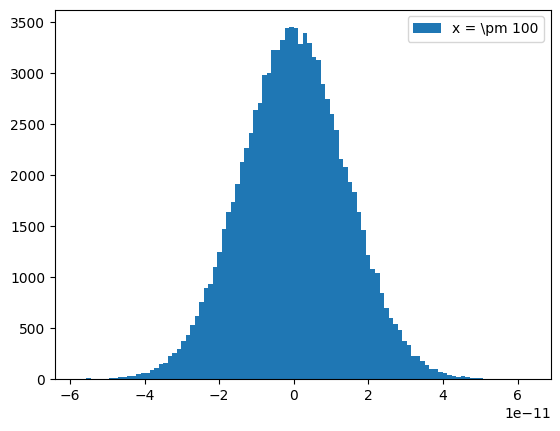

In [30]:
# making array and plt
N_1 = np.random.normal(x_1,std_1,n_1)
N_2 = np.random.normal(x_2,std_2,n_1)
N_sum = np.add(N_1,N_2)
plt.hist(N_sum, bins = bin, label = 'x = +- 100')
plt.legend()

In [32]:
# inputting new values
n_1 = 100000
bin = 100
C = 10e-14
x_1 = 1
x_2 = -1
std_1 = C*abs(x_1)
std_2 = C*abs(x_2)

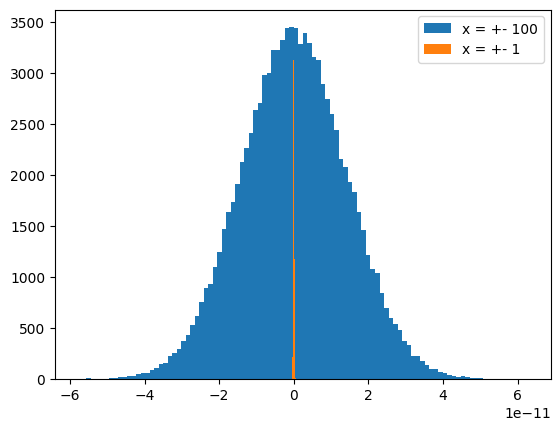

In [33]:
# repeat making array and plt with new x values
N_1new = np.random.normal(x_1,std_1,n_1)
N_2new = np.random.normal(x_2,std_2,n_1)
N_sumnew = np.add(N_1new,N_2new)
plt.hist(N_sum, bins = bin, label = 'x = +- 100')
plt.hist(N_sumnew, bins = bin, label = 'x = +- 1')
plt.legend()

# 2. Approximation Error

Consider this system representing phasor rotation in the complex plane:
    $$\dot Z = i\omega Z, \quad\text{given}\quad Z_0 = Z(t=0).$$
    
The analytical solution is:
    $Z(t) = Z_0 \exp(i\omega t).$

How can we solve it numerically? We could try using its Taylor expansion:
$$\dot Z(t) = \frac{Z(t+\Delta t)-Z(t)}{\Delta t} + H.O.T. = i\omega Z(t).$$
And use a simple algorithm such as: 
* Start with $Z_0$ = $Z(t=0)=Z_{old}$,
* $Z_{new} = (1+i\omega \Delta t)Z_{old}$,
* repeat for a large number $n$ of timesteps until we complete a full rotation

It turns out this simple algorithm is unstable, because of the accumulation of error.

## Part (a)
Write the code to implement the above algorithm, with $\omega, Z_0, n$ as parameters that can be set in the code. You should end up with an array of $t$ values and an array of $Z$ values covering a full rotation.

You may want to make use of numpy.pi

In [55]:
w = 1 #omega
step = 1000 #no of intervals

dt = 2*np.pi/(step*w) #timesteps
Z = np.empty(step,complex)
t= np.empty(step,float)
Z[0] = complex (0,0)
t[0] = 0

for i in range(step-1):
    Z[i+1] = (1+1j*w*dt)*Z[i]
    t[i+1] = t[i] + dt

## Part (b)
Using the code in the previous part, plot $|Z|(t)$ (absolute value of $Z$, as a function of $t$) for $n=200,Z_0=1,\omega=1$Hz . Is the result what you expected? Why?

In [56]:
w = 1  #omega
step = 200  #no of intervals

dt = 2 * np.pi / (step*w)  #timesteps
Z = np.empty(step, complex)
t = np.empty(step, float)
Z[0] = complex(1, 0)
t[0] = 0

for i in range(step - 1):
    Z[i + 1] = (1 + 1j * w * dt) * Z[i]
    t[i + 1] = t[i] + dt

array([ 1.00000000e+00+0.j        ,  1.00000000e+00+0.03141593j,
        9.99013040e-01+0.06283185j,  9.97039119e-01+0.09421677j,
        9.94079211e-01+0.12553968j,  9.90135266e-01+0.1567696j ,
        9.85210204e-01+0.18787562j,  9.79307917e-01+0.21882691j,
        9.72433267e-01+0.24959277j,  9.64592079e-01+0.28014267j,
        9.55791137e-01+0.31044622j,  9.46038182e-01+0.34047328j,
        9.35341898e-01+0.37019395j,  9.23711912e-01+0.39957858j,
        9.11158781e-01+0.42859785j,  8.97693982e-01+0.45722275j,
        8.83329906e-01+0.48542463j,  8.68079841e-01+0.51317526j,
        8.51957965e-01+0.54044679j,  8.34979328e-01+0.56721184j,
        8.17159843e-01+0.59344349j,  7.98516266e-01+0.61911533j,
        7.79066184e-01+0.64420145j,  7.58827998e-01+0.66867654j,
        7.37820905e-01+0.69251582j,  7.16064879e-01+0.71569515j,
        6.93580653e-01+0.73819099j,  6.70389699e-01+0.75998047j,
        6.46514208e-01+0.78104139j,  6.21977069e-01+0.80135223j,
        5.96801847e-01+0.

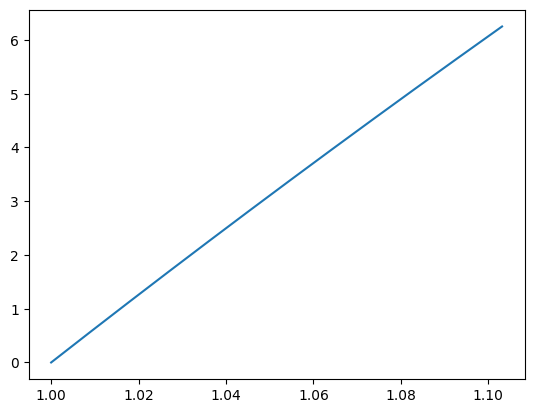

In [59]:
plt.plot (np.abs(Z),t)
Z